In [1]:
#本文是多元线性回归模型
import numpy as np
import matplotlib.pyplot as plt

#load data from file
#导入数据，并且观察一下
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in range(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)

    return np.array(data)

In [2]:
#feature normalize,Scale features and set them to zero mean
#定义一下特征缩放函数，因为每个特征的取值范围不同，且差异很大
def featureNormalize(X):
    avg = np.mean(X, axis=0)  # 均值
    sigma = np.std(X, axis=0)  # 标准差
    X_norm = (X - avg) / sigma
    return X_norm, avg, sigma

In [3]:
#plot the j_cost,绘制训练的cost曲线,可以调节学习率
def draw_cost(J_history):
    plt.plot(J_history,color = 'g')
    plt.xlabel('iters')
    plt.ylabel('J_cost')
    plt.title('cost variety')
    plt.show()

In [4]:
# 预测函数
def h(theta,X):
    return X.dot(theta)

# 代价函数
def cost_function(theta,X,Y):
    m = X.shape[0]
    result = np.sum(np.square(h(theta,X)-Y))/(2*m)
    return result

# 梯度下降
def gradient_descent(theta,X,Y,alpha,iterate_times):
    J_history = []
    m = X.shape[0]
    for i in range(iterate_times):
        theta = theta - alpha * X.T .dot(h(theta,X)-Y) / m
        cost = cost_function(theta, X, Y)
        J_history.append(cost)
    return theta, J_history

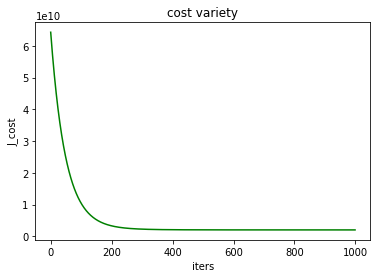

In [5]:
#predict (Note :normalize the feature with the train sets)
#预测一下，记得使用训练集的均值和方差去进行特征缩放
data = load_data('ex1data2.txt')
X = data[:,:-1]
X ,avr ,sigma = featureNormalize(X)
Y = data[:,-1:]
m = X.shape[0]
X = np.hstack((np.ones((m,1)),X))  # 加一列
theta = np.zeros((X.shape[1],1))
alpha = 0.01
iterate_times = 1000

theta,J_history = gradient_descent(theta,X,Y,alpha,iterate_times)
draw_cost(J_history)

In [6]:
#compute the gradient by using Normal Equations  
#without feature scaling and gradient descent
#直接使用公式求解最佳theta,不用梯度下降法
XX = data[:,:-1]
yy = data[:,-1:]
m = XX.shape[0]

one = np.ones((m,1))
XX = np.hstack((one,data[:,:-1]))
print(XX.shape)
print(yy.shape)

def normalEquation(X_train,y_train):
    w = np.zeros((X_train.shape[0],1))
    w = ((np.linalg.pinv(X_train.T.dot(X_train))).dot(X_train.T)).dot(y_train)
    return w
w = normalEquation(XX,yy)
print('Theta computed from the normal equations:')
print(w)

(47, 3)
(47, 1)
Theta computed from the normal equations:
[[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]


In [7]:
#predict price
price = np.dot(np.array([[1,1650,3]]),w)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations)')
print(price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations)
[[293081.46433497]]
